<div class="alert alert-block alert-info">
Visit the <a href="https://github.com/engs1258/biomedical-image-analysis-notebooks/wiki">wiki</a> pages to find some additional documentation and instructions on how view an interactive verson of these notebooks using binder.</div>

---
 

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt


from skimage import io, segmentation, color
from skimage.future import graph

%matplotlib inline

In [2]:
image = io.imread("../images/head-ct.jpg")
rows, cols, depth = image.shape
print(rows)
print(cols)
print(depth)

720
960
3


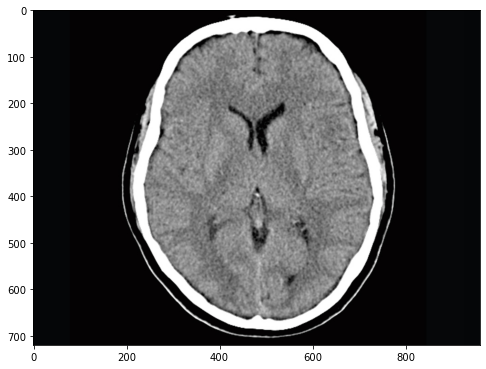

In [3]:
fig, ax = plt.subplots(figsize=(8, 8))
plt.imshow(image)

## Partion the image into superpixels

In [4]:
segments_slic = segmentation.slic(image, n_segments=1200, compactness=30, sigma=.5)
print(np.amax(segments_slic))

/var/folders/2w/n6sc7dy14_j2gfnf1cd0g2q00000gn/T/ipykernel_45979/1122812162.py:1: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  segments_slic = segmentation.slic(image, n_segments=1200, compactness=30, sigma=.5)


1166


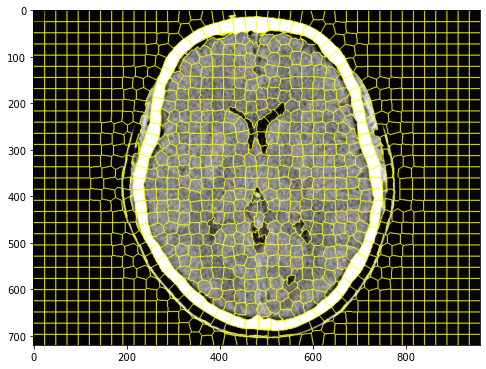

In [5]:
fig, ax = plt.subplots(figsize=(8, 8))
plt.imshow(segmentation.mark_boundaries(image, segments_slic))
plt.show()

## Now compute the normalised cut on the superpixels

In [6]:
g = graph.rag_mean_color(image, segments_slic, mode='similarity')
labels = graph.cut_normalized(segments_slic, g)
output = color.label2rgb(labels, image, kind='avg')

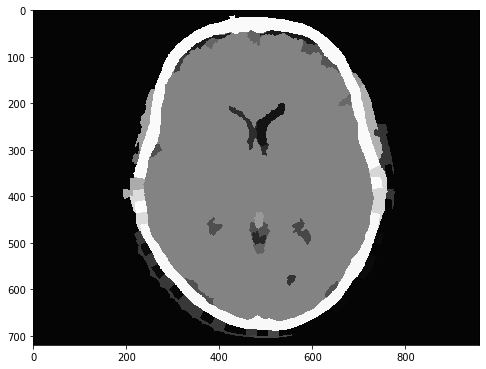

In [7]:
fig, ax = plt.subplots(figsize=(8, 8))
plt.imshow(output)
plt.show()